# Single-Task Learning on Cifar10 Dataset (10 Classes): A CNN Approach
- **Name**: Minh T. Nguyen & Peter Chen.
- **ECE 6524** - Final Project.
- **Date**: 4/18/2023.
- **Objective**: Build a Single Task CNN model using ResNet152 architecture for 10-classes image classification on Cifar10.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# import tensorflow
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import np_utils, plot_model
from keras.layers import Input, Dropout, Flatten, Dense
from keras.applications.resnet import ResNet152, preprocess_input
from keras import Model, Sequential

# 1. Data Visualization & Preprocessing

In [2]:
num_classes = 10          # number of classes
input_shape = (32, 32, 3) # original input image size

In [3]:
# download data from Keras API
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [4]:
# check dataset size
print(f"X={X_train.shape}, y={y_train.shape}")
print(f"X={X_test.shape}, y={y_test.shape}")

X=(50000, 32, 32, 3), y=(50000, 1)
X=(10000, 32, 32, 3), y=(10000, 1)


## 1.1. Data Visualization

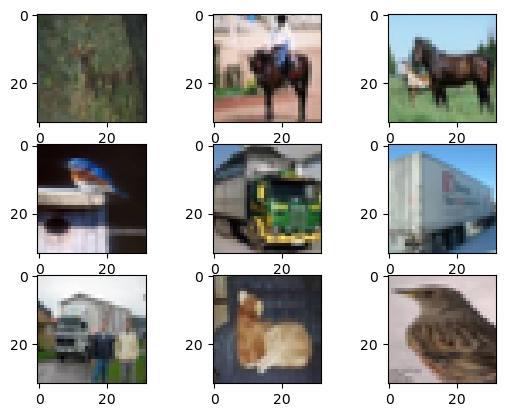

In [5]:
# plot the 9 images
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(X_train[10])
axarr[0,1].imshow(X_train[11])
axarr[0,2].imshow(X_train[12])
axarr[1,0].imshow(X_train[13])
axarr[1,1].imshow(X_train[14])
axarr[1,2].imshow(X_train[15])
axarr[2,0].imshow(X_train[16])
axarr[2,1].imshow(X_train[17])
axarr[2,2].imshow(X_train[18])
plt.show()

## 1.2. Data Preprocessing

In [6]:
# normalize input data
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

In [7]:
# convert class into one hot encoder
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# 2. Modeling
**Note**: Build a sequential model using ResNet152 architecture

In [8]:
# Define ResNet152 CNN model
def create_model(dropout):
    input_shape = (32, 32, 3)
    
    resnet152_base = ResNet152(weights=None, include_top=False, input_shape=input_shape)
    
    model = Sequential()
    
    model.add(resnet152_base)
    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax'))
    
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 1, 1, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               5

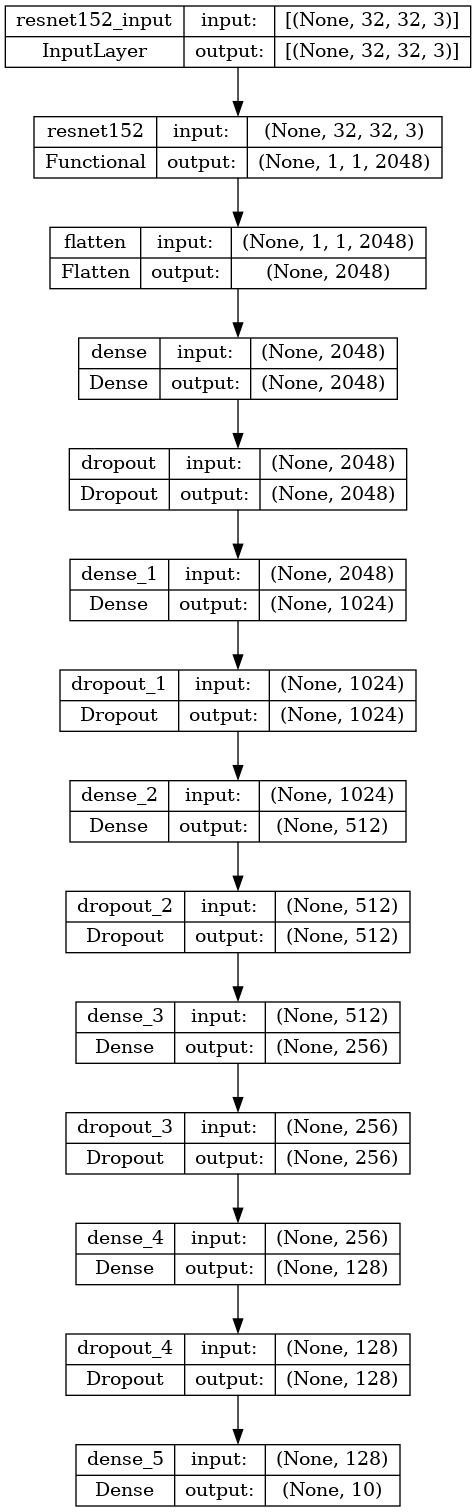

In [9]:
# display and plot model
model = create_model(0)
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
# define number of epochs
epochs = 20

# 2.1 Model 1 (Batch Size = 256, Dropout = 0, Optimizer = Adam)


In [11]:
# define parameters and generate model
batch_size = 256
dropout = 0
optimizer = 'Adam'

model_1 = create_model(dropout)

In [12]:
# compile model
model_1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [13]:
# train model
history_1 = model_1.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
167/167 [==============================] - 139s 204ms/step - loss: 2.2020 - accuracy: 0.1589 - val_loss: 2.3189 - val_accuracy: 0.0833
Epoch 2/20
167/167 [==============================] - 31s 184ms/step - loss: 2.0040 - accuracy: 0.2042 - val_loss: 3.2179 - val_accuracy: 0.1135
Epoch 3/20
167/167 [==============================] - 32s 190ms/step - loss: 1.8616 - accuracy: 0.2563 - val_loss: 2.1883 - val_accuracy: 0.2080
Epoch 4/20
167/167 [==============================] - 31s 184ms/step - loss: 1.7005 - accuracy: 0.3176 - val_loss: 2.2373 - val_accuracy: 0.1901
Epoch 5/20
167/167 [==============================] - 32s 190ms/step - loss: 1.6744 - accuracy: 0.3516 - val_loss: 3.0610 - val_accuracy: 0.1399
Epoch 6/20
167/167 [==============================] - 32s 190ms/step - loss: 1.4798 - accuracy: 0.4386 - val_loss: 3.0504 - val_accuracy: 0.2272
Epoch 7/20
167/167 [==============================] - 31s 185ms/step - loss: 1.5556 - accuracy: 0.4125 - val_loss: 3.0957 - val_a

In [14]:
# train model results
print('Train Loss:', history_1.history['loss'][-1])
print('Train Acc:', history_1.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_1.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.5676737427711487
Train Acc: 0.8036941289901733

Test Loss: 1.4296631813049316
Test Acc: 0.5900999903678894


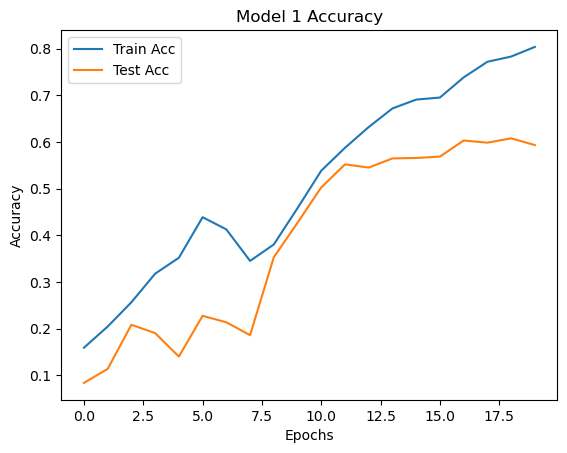

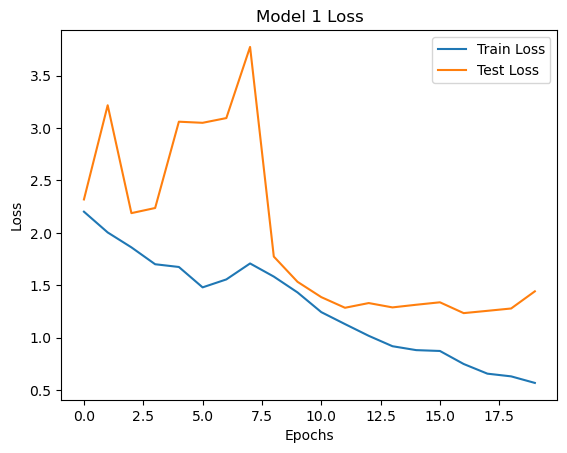

In [15]:
# Accuracy Plot
plt.plot(history_1.history['accuracy'], label='Train Acc')
plt.plot(history_1.history['val_accuracy'], label='Test Acc')
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Test Loss')
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.2 Model 2 (Batch Size = 128, Dropout = 0, Optimizer = Adam)

In [16]:
# define parameters and generate model
batch_size = 128
dropout = 0
optimizer = 'Adam'

model_2 = create_model(dropout)

In [17]:
# compile model
model_2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [18]:
# train model
history_2 = model_2.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
333/333 [==============================] - 147s 144ms/step - loss: 2.0893 - accuracy: 0.1891 - val_loss: 2.0346 - val_accuracy: 0.2047
Epoch 2/20
333/333 [==============================] - 45s 134ms/step - loss: 1.8968 - accuracy: 0.2423 - val_loss: 1.8903 - val_accuracy: 0.2689
Epoch 3/20
333/333 [==============================] - 45s 135ms/step - loss: 1.7789 - accuracy: 0.2866 - val_loss: 1.7423 - val_accuracy: 0.3019
Epoch 4/20
333/333 [==============================] - 45s 134ms/step - loss: 1.6124 - accuracy: 0.3698 - val_loss: 2.3286 - val_accuracy: 0.2815
Epoch 5/20
333/333 [==============================] - 45s 136ms/step - loss: 1.6065 - accuracy: 0.3915 - val_loss: 1.5025 - val_accuracy: 0.4511
Epoch 6/20
333/333 [==============================] - 45s 135ms/step - loss: 1.3636 - accuracy: 0.4969 - val_loss: 1.4669 - val_accuracy: 0.4740
Epoch 7/20
333/333 [==============================] - 45s 135ms/step - loss: 1.2356 - accuracy: 0.5569 - val_loss: 1.3810 - val_a

In [19]:
# train model results
print('Train Loss:', history_2.history['loss'][-1])
print('Train Acc:', history_2.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_2.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.9249881505966187
Train Acc: 0.6759999990463257

Test Loss: 1.1497398614883423
Test Acc: 0.6320000290870667


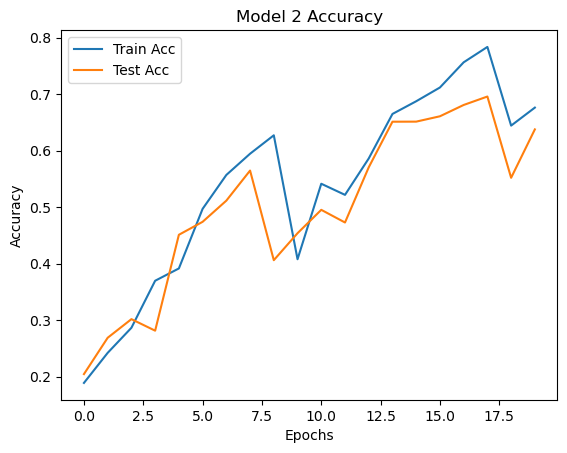

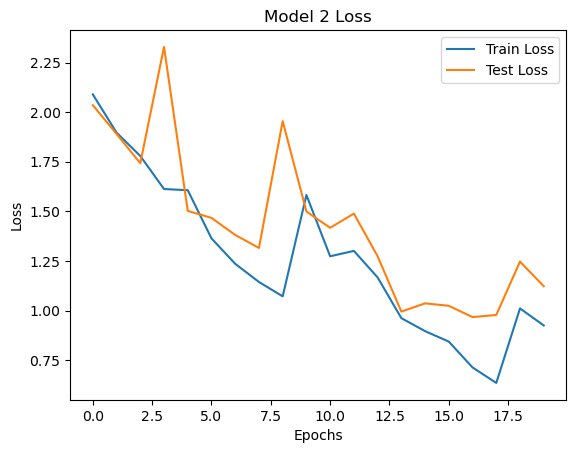

In [20]:
# Accuracy Plot
plt.plot(history_2.history['accuracy'], label='Train Acc')
plt.plot(history_2.history['val_accuracy'], label='Test Acc')
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Test Loss')
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.3 Model 3 (Batch Size = 256, Dropout = 0.5, Optimizer = Adam)

In [21]:
# define parameters and generate model
batch_size = 128
dropout = 0.5
optimizer = 'Adam'

model_3 = create_model(dropout)

In [22]:
# compile model
model_3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [23]:
# train model
history_3 = model_3.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
333/333 [==============================] - 148s 146ms/step - loss: 2.5948 - accuracy: 0.1031 - val_loss: 2.3025 - val_accuracy: 0.1112
Epoch 2/20
333/333 [==============================] - 45s 137ms/step - loss: 2.2834 - accuracy: 0.1336 - val_loss: 2.2053 - val_accuracy: 0.1723
Epoch 3/20
333/333 [==============================] - 46s 137ms/step - loss: 2.1287 - accuracy: 0.1673 - val_loss: 2.1109 - val_accuracy: 0.1700
Epoch 4/20
333/333 [==============================] - 46s 138ms/step - loss: 2.0024 - accuracy: 0.1790 - val_loss: 1.9451 - val_accuracy: 0.1913
Epoch 5/20
333/333 [==============================] - 45s 136ms/step - loss: 1.9493 - accuracy: 0.1919 - val_loss: 1.9167 - val_accuracy: 0.2016
Epoch 6/20
333/333 [==============================] - 46s 137ms/step - loss: 1.9047 - accuracy: 0.1995 - val_loss: 1.9663 - val_accuracy: 0.1959
Epoch 7/20
333/333 [==============================] - 45s 136ms/step - loss: 1.9532 - accuracy: 0.1977 - val_loss: 1.9353 - val_a

In [24]:
# train model results
print('Train Loss:', history_3.history['loss'][-1])
print('Train Acc:', history_3.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_3.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 2.0915682315826416
Train Acc: 0.18352940678596497

Test Loss: 2.11361026763916
Test Acc: 0.17970000207424164


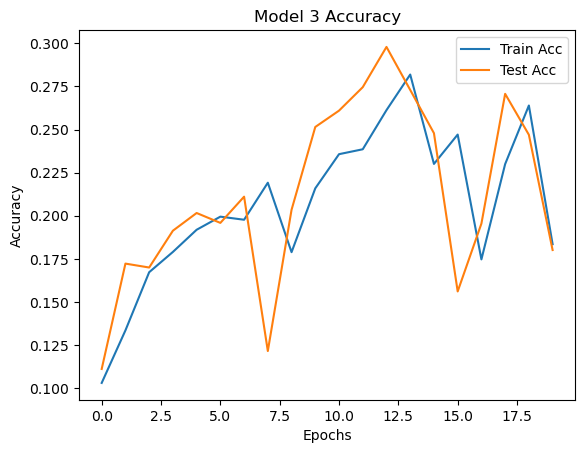

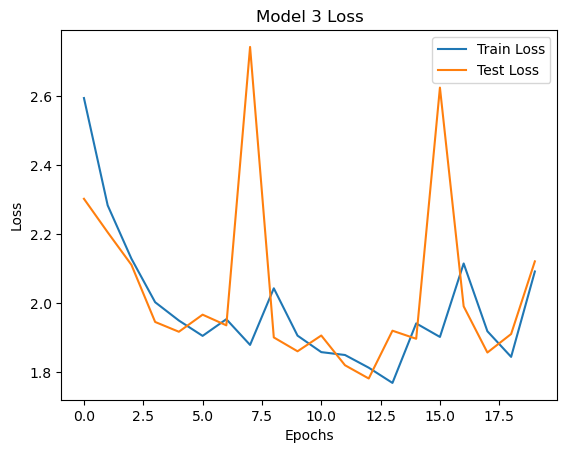

In [25]:
# Accuracy Plot
plt.plot(history_3.history['accuracy'], label='Train Acc')
plt.plot(history_3.history['val_accuracy'], label='Test Acc')
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Test Loss')
plt.title('Model 3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.4 Model 4 (Batch Size = 256, Dropout = 0, Optimizer = SGD)

In [26]:
# define parameters and generate model
batch_size = 256
dropout = 0
optimizer = 'SGD'

model_4 = create_model(dropout)

In [27]:
# compile model
model_4.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [28]:
# train model
history_4 = model_4.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
167/167 [==============================] - 77s 197ms/step - loss: 2.2136 - accuracy: 0.1664 - val_loss: 50570854400.0000 - val_accuracy: 0.1008
Epoch 2/20
167/167 [==============================] - 31s 185ms/step - loss: 2.0755 - accuracy: 0.2240 - val_loss: 23.3858 - val_accuracy: 0.1076
Epoch 3/20
167/167 [==============================] - 31s 185ms/step - loss: 1.9690 - accuracy: 0.2681 - val_loss: 7.8465 - val_accuracy: 0.0893
Epoch 4/20
167/167 [==============================] - 30s 179ms/step - loss: 1.8954 - accuracy: 0.2937 - val_loss: 41.2033 - val_accuracy: 0.0999
Epoch 5/20
167/167 [==============================] - 31s 184ms/step - loss: 1.8464 - accuracy: 0.3142 - val_loss: 29.1232 - val_accuracy: 0.0889
Epoch 6/20
167/167 [==============================] - 30s 179ms/step - loss: 1.8927 - accuracy: 0.2974 - val_loss: 2.8403 - val_accuracy: 0.1219
Epoch 7/20
167/167 [==============================] - 30s 179ms/step - loss: 1.7796 - accuracy: 0.3379 - val_loss: 23

In [29]:
# train model results
print('Train Loss:', history_4.history['loss'][-1])
print('Train Acc:', history_4.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_4.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 1.7962391376495361
Train Acc: 0.29694119095802307

Test Loss: 13.170262336730957
Test Acc: 0.08709999918937683


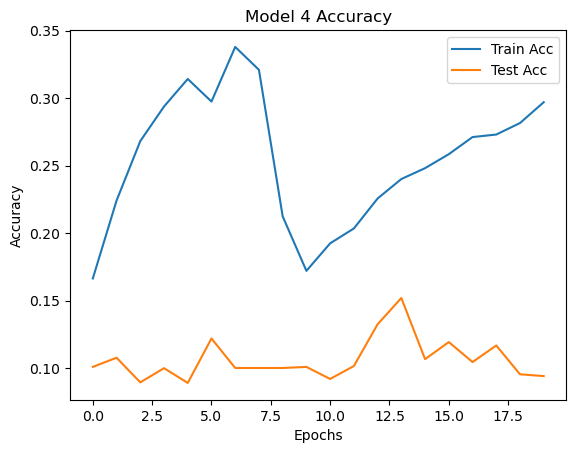

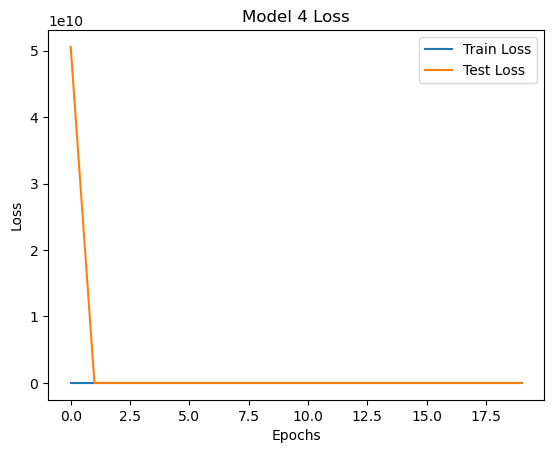

In [30]:
# Accuracy Plot
plt.plot(history_4.history['accuracy'], label='Train Acc')
plt.plot(history_4.history['val_accuracy'], label='Test Acc')
plt.title('Model 4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_4.history['loss'], label='Train Loss')
plt.plot(history_4.history['val_loss'], label='Test Loss')
plt.title('Model 4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.5 Model 5 (Batch Size = 128, Dropout = 0, Optimizer = SGD)

In [31]:
# define parameters and generate model
batch_size = 128
dropout = 0
optimizer = 'SGD'

model_5 = create_model(dropout)

In [32]:
# compile model
model_5.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [33]:
# train model
history_5 = model_5.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
333/333 [==============================] - 90s 140ms/step - loss: 2.0696 - accuracy: 0.2218 - val_loss: 19621.9453 - val_accuracy: 0.0972
Epoch 2/20
333/333 [==============================] - 43s 130ms/step - loss: 1.8933 - accuracy: 0.2904 - val_loss: 177075.6719 - val_accuracy: 0.1008
Epoch 3/20
333/333 [==============================] - 44s 131ms/step - loss: 1.9045 - accuracy: 0.2975 - val_loss: 10.3730 - val_accuracy: 0.1223
Epoch 4/20
333/333 [==============================] - 43s 129ms/step - loss: 1.8184 - accuracy: 0.3233 - val_loss: 3.0077 - val_accuracy: 0.1075
Epoch 5/20
333/333 [==============================] - 43s 130ms/step - loss: 1.7564 - accuracy: 0.3463 - val_loss: 3.9746 - val_accuracy: 0.0987
Epoch 6/20
333/333 [==============================] - 43s 130ms/step - loss: 1.6836 - accuracy: 0.3729 - val_loss: 2.5976 - val_accuracy: 0.1461
Epoch 7/20
333/333 [==============================] - 44s 131ms/step - loss: 1.6018 - accuracy: 0.4043 - val_loss: 4.788

In [34]:
# train model results
print('Train Loss:', history_5.history['loss'][-1])
print('Train Acc:', history_5.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_5.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 1.1598998308181763
Train Acc: 0.5783764719963074

Test Loss: 2.2480711936950684
Test Acc: 0.2101999968290329


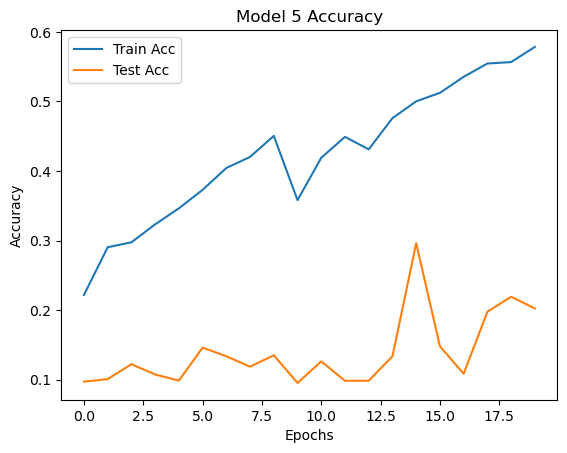

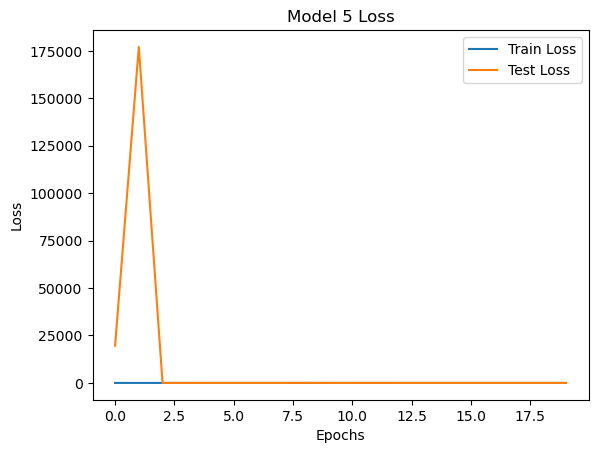

In [35]:
# Accuracy Plot
plt.plot(history_5.history['accuracy'], label='Train Acc')
plt.plot(history_5.history['val_accuracy'], label='Test Acc')
plt.title('Model 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_5.history['loss'], label='Train Loss')
plt.plot(history_5.history['val_loss'], label='Test Loss')
plt.title('Model 5 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.6 Model 6 (Batch Size = 256, Dropout = 0.5, Optimizer = SGD)

In [36]:
# define parameters and generate model
batch_size = 256
dropout = 0.5
optimizer = 'SGD'

model_6 = create_model(dropout)

In [37]:
# compile model
model_6.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [38]:
# train model
history_6 = model_6.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
167/167 [==============================] - 76s 203ms/step - loss: 2.6054 - accuracy: 0.1027 - val_loss: 11.2210 - val_accuracy: 0.1111
Epoch 2/20
167/167 [==============================] - 30s 179ms/step - loss: 2.3942 - accuracy: 0.1041 - val_loss: 11.7972 - val_accuracy: 0.0975
Epoch 3/20
167/167 [==============================] - 30s 180ms/step - loss: 2.3566 - accuracy: 0.1023 - val_loss: 2.5727 - val_accuracy: 0.1108
Epoch 4/20
167/167 [==============================] - 31s 187ms/step - loss: 2.3391 - accuracy: 0.1018 - val_loss: 2.4825 - val_accuracy: 0.1061
Epoch 5/20
167/167 [==============================] - 31s 188ms/step - loss: 2.3289 - accuracy: 0.1008 - val_loss: 49.7643 - val_accuracy: 0.1008
Epoch 6/20
167/167 [==============================] - 31s 186ms/step - loss: 2.3217 - accuracy: 0.1017 - val_loss: 2.7025 - val_accuracy: 0.1037
Epoch 7/20
167/167 [==============================] - 30s 179ms/step - loss: 2.3189 - accuracy: 0.1007 - val_loss: 2.4669 - val

In [39]:
# train model results
print('Train Loss:', history_6.history['loss'][-1])
print('Train Acc:', history_6.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_6.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 2.3042163848876953
Train Acc: 0.10192941129207611

Test Loss: 2.302511215209961
Test Acc: 0.1005999967455864


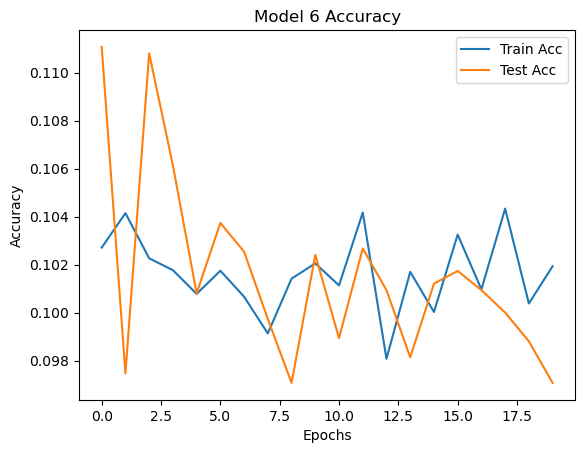

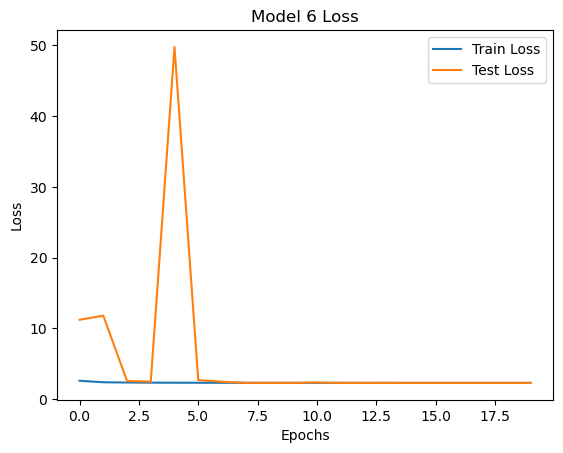

In [40]:
# Accuracy Plot
plt.plot(history_6.history['accuracy'], label='Train Acc')
plt.plot(history_6.history['val_accuracy'], label='Test Acc')
plt.title('Model 6 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_6.history['loss'], label='Train Loss')
plt.plot(history_6.history['val_loss'], label='Test Loss')
plt.title('Model 6 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()